### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio


### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [73]:
# Reading the coupons csv file
data = pd.read_csv('data/coupons.csv')

In [74]:
# Glancing at the data and its structure
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [103]:
# Getting a look at the null data and 
null_data = data.isnull().sum()
null_data
# Cars seem to have the most blanks, so will use fillna to add unknown to it.

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
car                       0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64

In [76]:
# Checking duplicates to see if some can be removed
duplicate_rows = data[data.duplicated()]

print(duplicate_rows)

# without individual identifiers removing duplicates can reduce data accuracy so leaving duplicates intact

     destination passanger weather  temperature  time                 coupon  \
4192        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4236        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4280        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4324        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4409        Work     Alone   Sunny           80   7AM  Carry out & Take away   
...          ...       ...     ...          ...   ...                    ...   
8511        Home     Alone   Sunny           80   6PM                    Bar   
8512        Home   Partner   Sunny           30  10PM  Carry out & Take away   
8513        Work     Alone   Rainy           55   7AM        Restaurant(<20)   
8515        Work     Alone   Snowy           30   7AM      Restaurant(20-50)   
8516        Work     Alone   Sunny           80   7AM        Restaurant(<20)   

     expiration  gender age    maritalS

3. Decide what to do about your missing data -- drop, replace, other...

In [77]:
# Cleaning up data, removing symbols and making text more readable and addressable 

data['destination'] = data['destination'].str.replace('No Urgent Place','no_place')

data['passanger'] = data['passanger'].str.replace('(','')
data['passanger'] = data['passanger'].str.replace(')','')

data['RestaurantLessThan20'] = data['RestaurantLessThan20'].str.replace('~','-')
data['Restaurant20To50'] = data['Restaurant20To50'].str.replace('~','-')

data['income'] = data['income'].str.replace('$','')


data['coupon'] = data['coupon'].str.replace('(',' ')
data['coupon'] = data['coupon'].str.replace(')','')
data['coupon'] = data['coupon'].str.replace('&','-')


data['education'] = data['education'].str.replace('Some college - ','')

data['maritalStatus'] = data['maritalStatus'].str.replace('partner','')
data['maritalStatus'] = data['maritalStatus'].str.replace('partner','')

data['Bar'] = data['Bar'].str.replace('gt8','greater_than_8')

data['CoffeeHouse'] = data['CoffeeHouse'].str.replace('gt8','greater_than_8')

data['CarryAway'] = data['CarryAway'].str.replace('gt8','greater_than_8')

data['RestaurantLessThan20'] = data['RestaurantLessThan20'].str.replace('gt8','greater_than_8')
data['Restaurant20To50'] = data['Restaurant20To50'].str.replace('gt8','greater_than_8')

data['occupation'] = data['occupation'].str.replace(' & ','_')
data['occupation'] = data['occupation'].str.replace('&','_')


In [78]:
# Filling the missing data in car column

data['car'] = data['car'].fillna('Unknown')

4. What proportion of the total observations chose to accept the coupon? 



In [79]:
# Acceptance rate caclulation

accepted_coupon_prop = round(data['Y'].mean() * 100,2)
print(f'Acceptance rate of coupons is: {accepted_coupon_prop}%')


Acceptance rate of coupons is: 56.84%


In [110]:
# Calculating the overall coupon acceptance rates for different types of coupon

acceptance_rate_by_coupon = data.groupby('coupon')['Y'].mean().reset_index()
acceptance_rate_by_coupon['Y'] *= 100
acceptance_rate_by_coupon.columns = ['Coupon', 'Acceptance Rate']

print(acceptance_rate_by_coupon)

                  Coupon  Acceptance Rate
0                    Bar        41.001487
1  Carry out - Take away        73.547848
2           Coffee House        49.924925
3       Restaurant 20-50        44.101877
4         Restaurant <20        70.710696


5. Use a bar plot to visualize the `coupon` column.

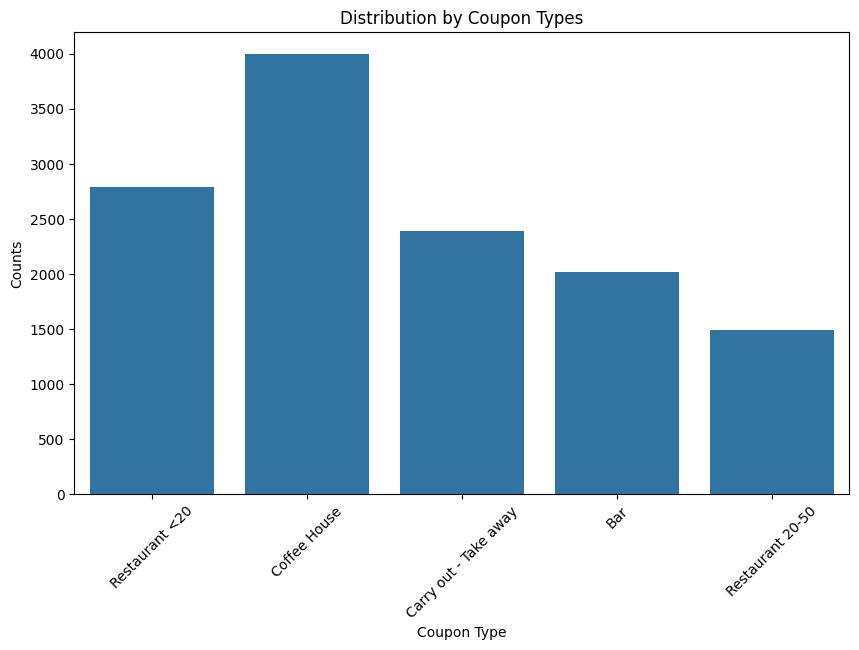

In [80]:
# Generating visuals for the coupon column to see counts of coupons by type

plt.figure(figsize=(10,6))
sns.countplot(data=data, x='coupon')
plt.title('Distribution by Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

6. Use a histogram to visualize the temperature column.

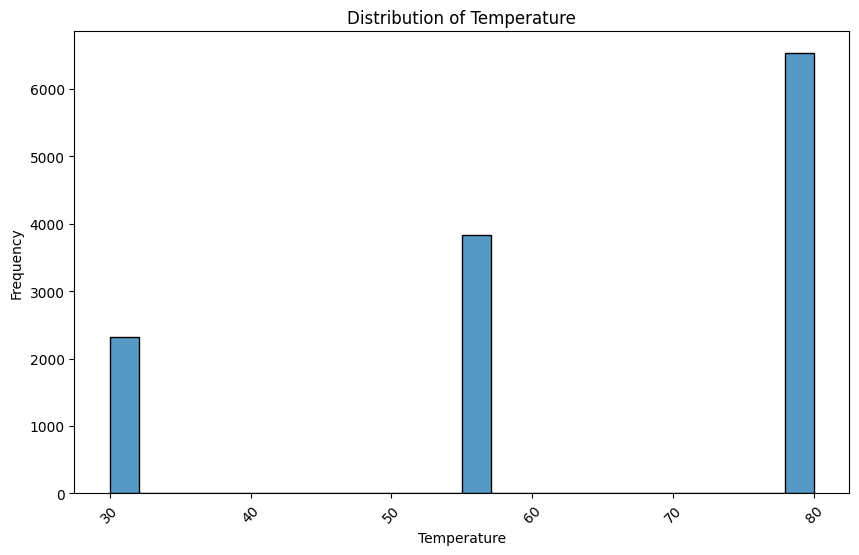

In [81]:
# Histogram of the temperatures for the observations

plt.figure(figsize=(10,6))
sns.histplot(data=data, x='temperature')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [82]:
# Selecting a subgroup of coupons from the different coupons, selection to only Bar type coupons

coupons_bar = data[data['coupon'] == 'Bar']
coupons_bar

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,no_place,Kids,Sunny,80,10AM,Bar,1d,Female,21,Unmarried,...,never,NaN,4-8,1-3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried,...,never,NaN,4-8,1-3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried,...,never,NaN,4-8,1-3,1,1,1,0,1,0
24,no_place,Friends,Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4-8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4-8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,no_place,Friends,Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4-8,1-3,1,1,0,0,1,0
12664,no_place,Friends,Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4-8,1-3,1,1,0,0,1,0
12667,no_place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4-8,1-3,1,1,0,0,1,0
12670,no_place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4-8,1-3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [83]:
# Calculating the proportion of bar coupons that were accepted and then printing the output


accepted_bar_coupon_prop = round(coupons_bar['Y'].mean() * 100,2)
print(f'Acceptance rate of bar coupons is: {accepted_bar_coupon_prop}%')

Acceptance rate of bar coupons is: 41.0%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [84]:
# Comparing the different types of bar goes, 3 and under compared to 4 or more and then printing the output


under3 = ["never","1~3","less1"]
over3 = ["4~8","greater_than_8"]
acrate_3andunder = round(data[data['Bar'].isin(under3)]['Y'].mean() * 100,2)
acrate_morethan3 = round(data[data['Bar'].isin(over3)]['Y'].mean() * 100,2)
print(f'Acceptance rate of users who went to bar 3 or less times is: {acrate_3andunder}%')
print(f'Acceptance rate of users who went to bar more than 3 times is: {acrate_morethan3}%')

Acceptance rate of users who went to bar 3 or less times is: 56.21%
Acceptance rate of users who went to bar more than 3 times is: 62.25%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [85]:
# Comparing acceptance rate of people who go more than 1 and are over the age of 25 vs all other users and then printing the output


more_than_1_and_over_25 = data[(data['Bar'].isin(['1~3','4~8','greater_than_8'])) & (data['age'].isin(['26','31','41','50plus']))]

all_others = data[~((data['Bar'].isin(['1~3','4~8','greater_than_8'])) & (data['age'].isin(['26','31','41','50plus'])))]

acrate_more_than_1_and_over_25 = round(more_than_1_and_over_25['Y'].mean() * 100, 2)
acrate_all_others = round(all_others['Y'].mean() * 100, 2)

print(f'Users who go more than once and are over 25 years old have the acceptance rate of: {acrate_more_than_1_and_over_25}%') 
print(f'All other users have the acceptance rate of: {acrate_all_others}%') 

Users who go more than once and are over 25 years old have the acceptance rate of: 61.41%
All other users have the acceptance rate of: 55.77%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [86]:
# creating 2 groups, 1 for the selected set of users and other for all of the remaining and then printing the output

select_group = data [
    (data['Bar'].isin(['1~3','4~8','greater_than_8'])) & (data['passanger'] != 'Kid(s)') & 
    (~data['occupation'].isin(['Farming Fishing & Forestry']))
]

all_other_group = data [~(
    (data['Bar'].isin(['1~3','4~8','greater_than_8'])) & (data['passanger'] != 'Kid(s)') & 
    (data['occupation'].isin(['Farming Fishing & Forestry']))
)]

acrate_select_group = round(select_group['Y'].mean() * 100, 2)
acrate_all_other_group = round(all_other_group['Y'].mean() * 100, 2)

print(f'Selected group acceptance rate: {acrate_select_group}%') 
print(f'All other users have the acceptance rate of: {acrate_all_other_group}%') 

Selected group acceptance rate: 62.21%
All other users have the acceptance rate of: 56.84%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [87]:
# creating 3 different set of user groups, filtering data sets calculating the acceptance rates and then printing the output

first_set = (data['Bar'].isin(['1~3', '4~8', 'greater_than_8'])) & (~data['passanger'].isin(['Kid(s)', 'Alone'])) & (data['maritalStatus'] != 'Widowed')
second_set = (data['Bar'].isin(['1~3', '4~8', 'greater_than_8'])) & (data['age'].isin(['below21', '21', '26']))
third_set = (data['RestaurantLessThan20'].isin(['4~8', 'greater_than_8'])) & (data['income'].isin(['Less than 12500', '12500 - 24999', '25000 - 37499', '37500 - 49999']))

filtered_first_set = data[first_set]
filtered_second_set = data[second_set]
filtered_third_set = data[third_set]

acrate_first_set = round(filtered_first_set['Y'].mean() * 100, 2)
acrate_second_set = round(filtered_second_set['Y'].mean() * 100, 2)
acrate_third_set = round(filtered_third_set['Y'].mean() * 100, 2)

print(f"Acceptance Rate for people who go to bars more than once a month that had non kids passengers and were not widowed were: {acrate_first_set}%")
print(f"Acceptance Rate for people who go to bars more than once a month and are under the age of 30 are: {acrate_second_set}%")
print(f"Acceptance Rate for people who to cheap restaurants more than 4 times a month with income less than 50k are: {acrate_third_set}%")

Acceptance Rate for people who go to bars more than once a month that had non kids passengers and were not widowed were: 67.95%
Acceptance Rate for people who go to bars more than once a month and are under the age of 30 are: 62.81%
Acceptance Rate for people who to cheap restaurants more than 4 times a month with income less than 50k are: 66.32%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [88]:
# Observations
#
# While bar coupons were the second least accepted coupon in this data set. 
# The overall acceptance rate was 41% the highest acceptance rates came from cars with no kid passengers and not widowed and folks that go to cheap restaurants with income less than 50k.
# Lowest acceptance rate unsurprisingly came from users who go to bars fewer than 3 times a month. 



### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

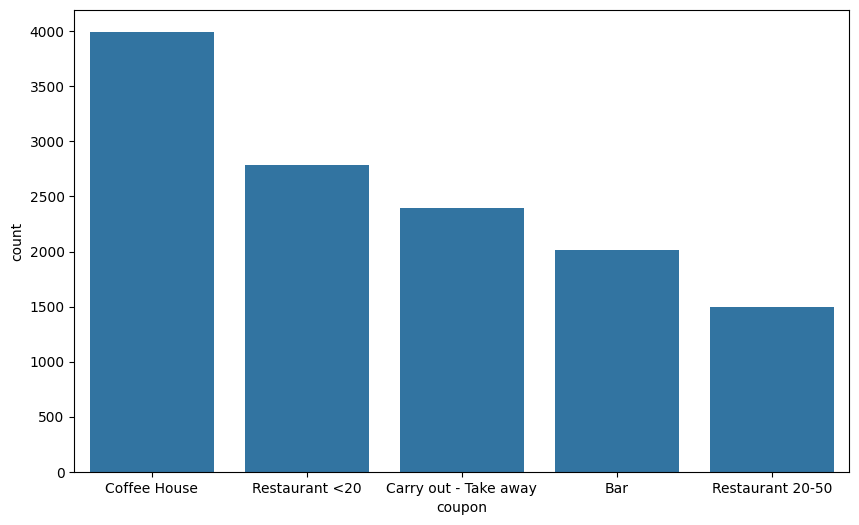

In [89]:
# Looking at the coupon counts across all categories
plt.figure(figsize=(10,6))
fig = sns.barplot(data['coupon'].value_counts())


In [90]:
# Selecting the coffee House coupons as it is the most distributed one

coupons_coffee = data[data['coupon'] == 'Coffee House']
coupons_coffee

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,no_place,Friends,Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried,...,never,NaN,4-8,1-3,1,0,0,0,1,0
3,no_place,Friends,Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried,...,never,NaN,4-8,1-3,1,1,0,0,1,0
4,no_place,Friends,Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried,...,never,NaN,4-8,1-3,1,1,0,0,1,0
12,no_place,Kids,Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried,...,never,NaN,4-8,1-3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried,...,never,NaN,4-8,1-3,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,31,Married,...,never,4~8,greater_than_8,less1,1,1,0,0,1,0
12659,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,31,Married,...,never,4~8,greater_than_8,less1,1,0,0,1,0,0
12674,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4-8,1-3,1,0,0,1,0,0
12675,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4-8,1-3,1,1,0,0,1,0


In [91]:
# Calculating the acceptance rates for coffee house coupons

accepted_coffee_coupon = round(coupons_coffee['Y'].mean() * 100,2)
print(f'Acceptance rate of coffee coupons is: {accepted_coffee_coupon}%')

Acceptance rate of coffee coupons is: 49.92%


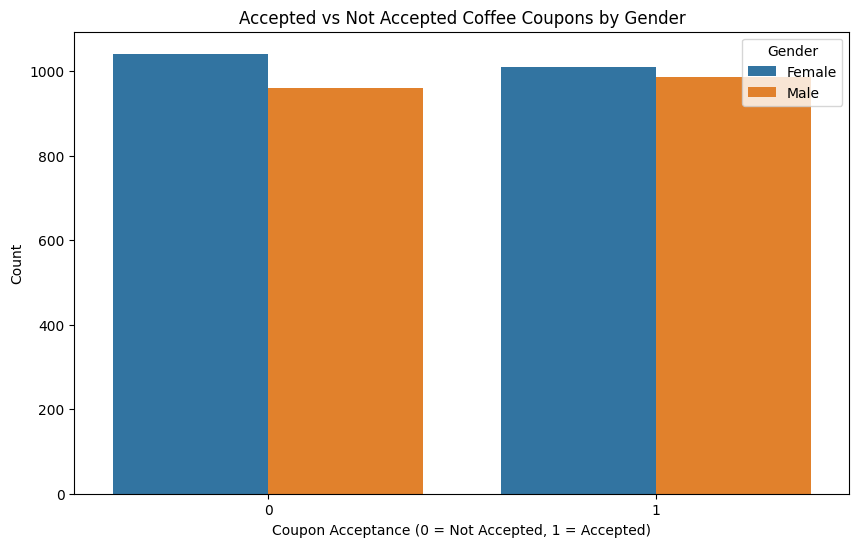

In [92]:
# Creating visualization for acceptance and rejection by gender
 
plt.figure(figsize=(10, 6))
sns.countplot(data=coupons_coffee, x='Y', hue='gender')
plt.xlabel('Coupon Acceptance (0 = Not Accepted, 1 = Accepted)')
plt.ylabel('Count')
plt.title('Accepted vs Not Accepted Coffee Coupons by Gender')
plt.legend(title='Gender')
plt.show()

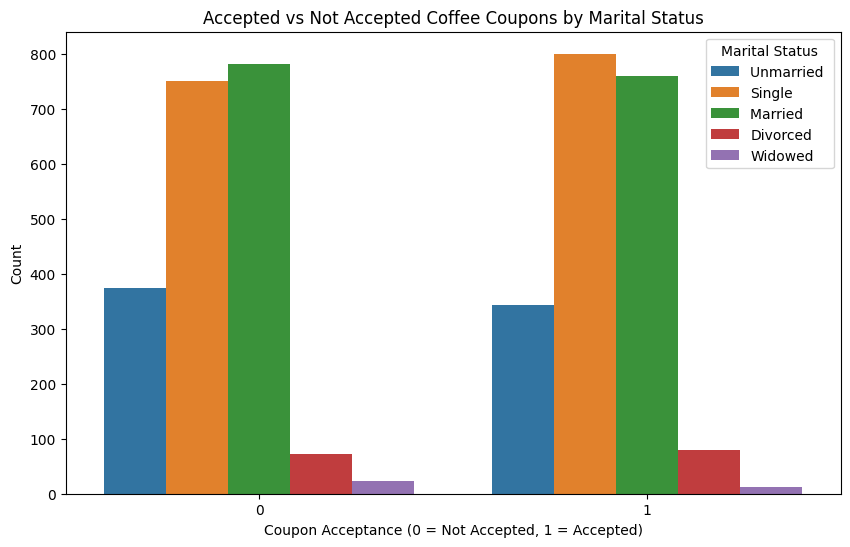

In [93]:
# Creating visualization for acceptance and rejection by marital status

plt.figure(figsize=(10, 6))
sns.countplot(data=coupons_coffee, x='Y', hue='maritalStatus')
plt.xlabel('Coupon Acceptance (0 = Not Accepted, 1 = Accepted)')
plt.ylabel('Count')
plt.title('Accepted vs Not Accepted Coffee Coupons by Marital Status')
plt.legend(title='Marital Status')
plt.show()

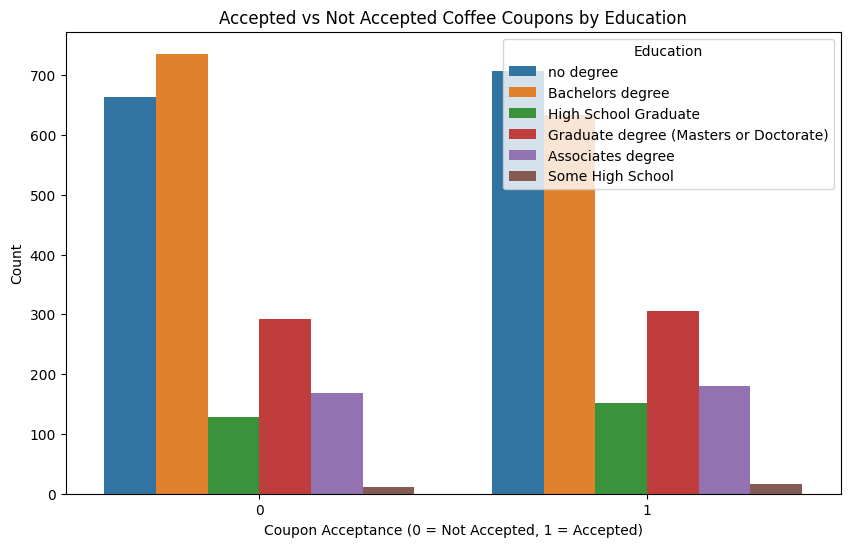

In [94]:
# Creating visualization for acceptance and rejection by education

plt.figure(figsize=(10, 6))
sns.countplot(data=coupons_coffee, x='Y', hue='education')
plt.xlabel('Coupon Acceptance (0 = Not Accepted, 1 = Accepted)')
plt.ylabel('Count')
plt.title('Accepted vs Not Accepted Coffee Coupons by Education')
plt.legend(title='Education')
plt.show()

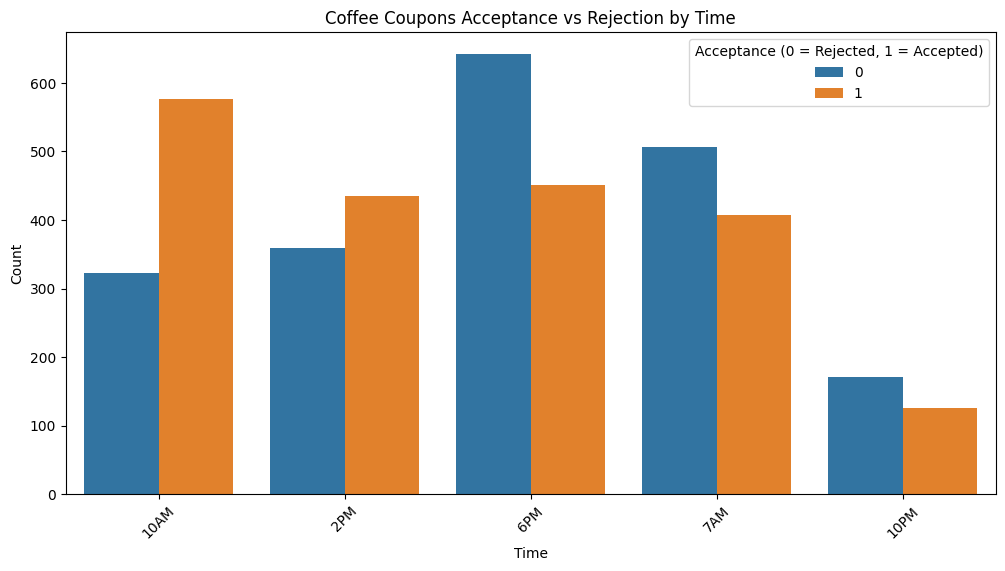

In [95]:
# Creating visualization for acceptance and rejection by time of day

plt.figure(figsize=(12, 6))
sns.countplot(data=coupons_coffee, x='time', hue='Y')
plt.title('Coffee Coupons Acceptance vs Rejection by Time')
plt.xlabel('Time')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Acceptance (0 = Rejected, 1 = Accepted)')
plt.show()


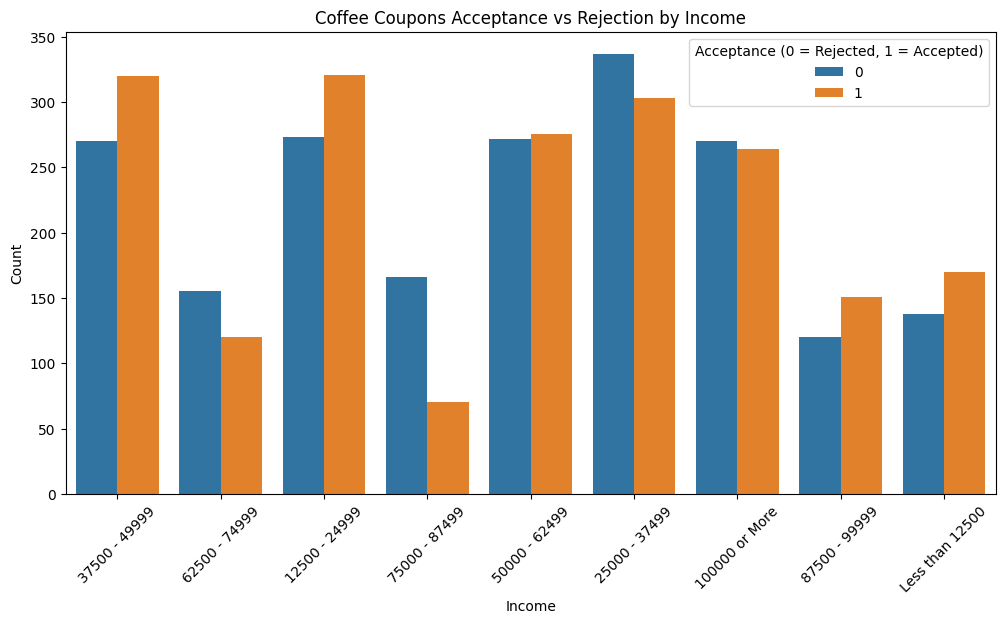

In [96]:
# Creating visualization for acceptance and rejection by income

plt.figure(figsize=(12, 6))
sns.countplot(data=coupons_coffee, x='income', hue='Y')
plt.title('Coffee Coupons Acceptance vs Rejection by Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Acceptance (0 = Rejected, 1 = Accepted)')
plt.show()

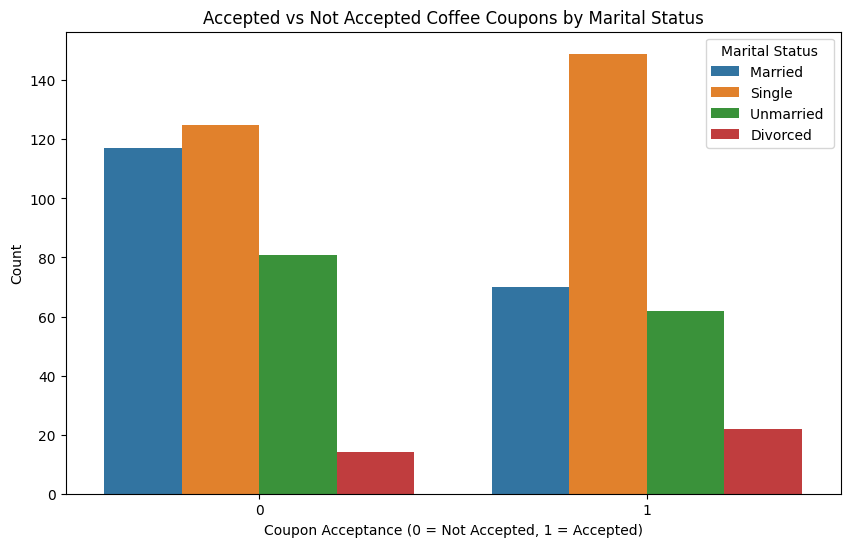

In [97]:
# as the rejection rate is higher 25k to 37.5k, limiting the dataset and analyzing further into data for folks with that income
# Settign up another visualization to see within the income range the acceptance and rejection for different marital status

coffee_coupons_acceptors = data[(data['coupon'] == 'Coffee House') & (data['income'] == '25000 - 37499')]

plt.figure(figsize=(10, 6))
sns.countplot(data=coffee_coupons_acceptors, x='Y', hue='maritalStatus')
plt.xlabel('Coupon Acceptance (0 = Not Accepted, 1 = Accepted)')
plt.ylabel('Count')
plt.title('Accepted vs Not Accepted Coffee Coupons by Marital Status')
plt.legend(title='Marital Status')
plt.show()


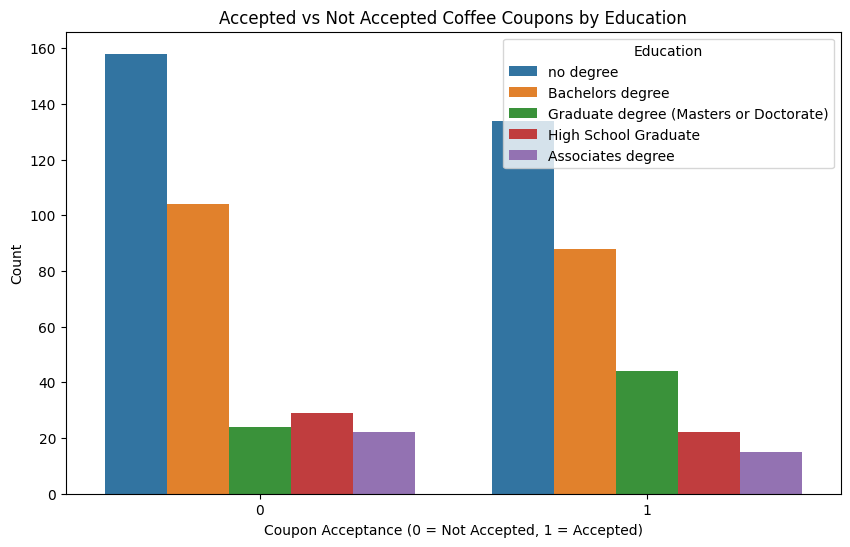

In [98]:
# Settign up another visualization to see within the income range the acceptance and rejection for each level of education

plt.figure(figsize=(10, 6))
sns.countplot(data=coffee_coupons_acceptors, x='Y', hue='education')
plt.xlabel('Coupon Acceptance (0 = Not Accepted, 1 = Accepted)')
plt.ylabel('Count')
plt.title('Accepted vs Not Accepted Coffee Coupons by Education')
plt.legend(title='Education')
plt.show()

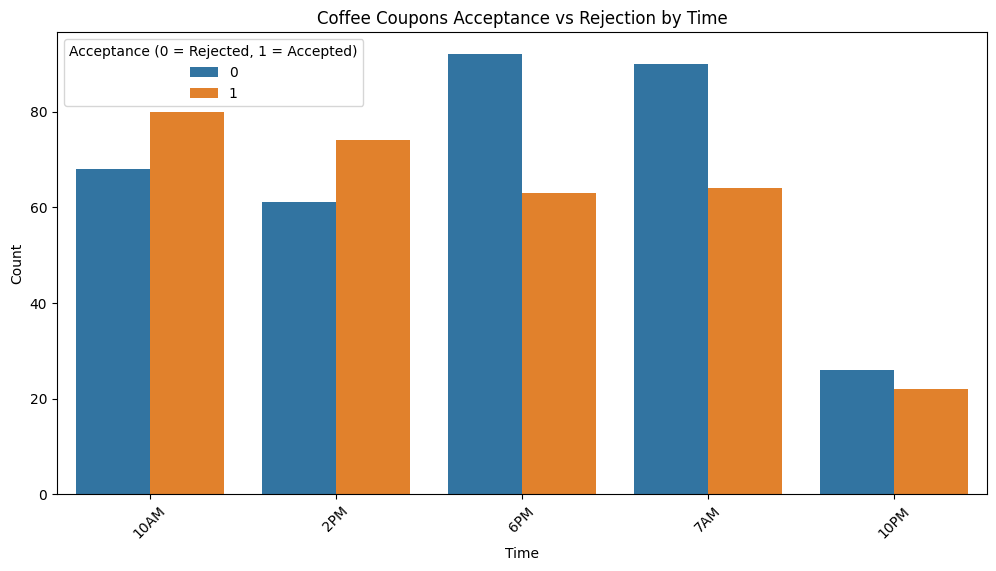

In [99]:
# Visualization within the 25k to 37.5k income range acceptance and rejection by time of day

plt.figure(figsize=(12, 6))
sns.countplot(data=coffee_coupons_acceptors, x='time', hue='Y')
plt.title('Coffee Coupons Acceptance vs Rejection by Time')
plt.xlabel('Time')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Acceptance (0 = Rejected, 1 = Accepted)')
plt.show()

In [100]:
# Back to using full dataset, findings for 25k-37.5k discussed in the observations at the bottom.

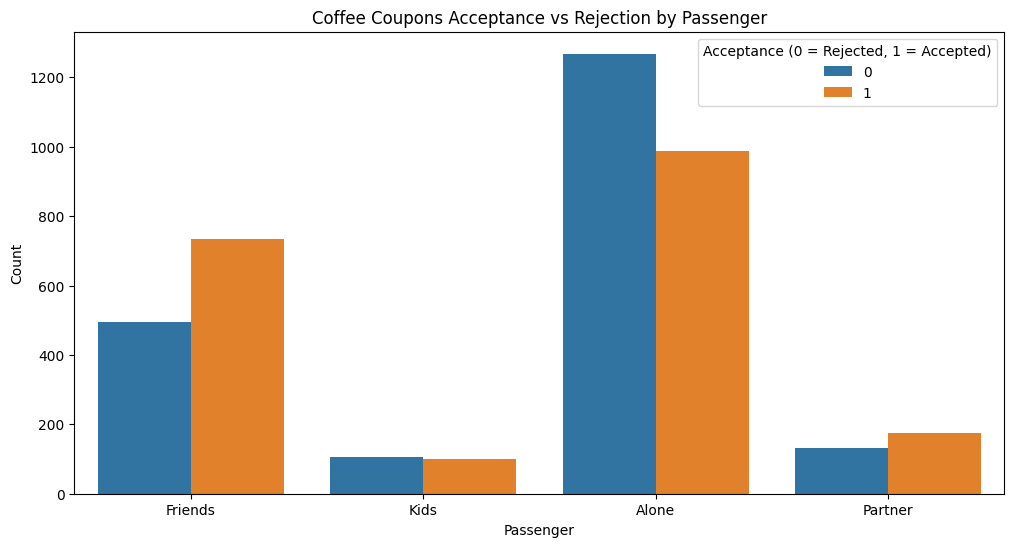

In [101]:
# Creating visualization for acceptance and rejection by passenger 

plt.figure(figsize=(12, 6))
sns.countplot(data=coupons_coffee, x='passanger', hue='Y')
plt.title('Coffee Coupons Acceptance vs Rejection by Passenger')
plt.xlabel('Passenger')
plt.ylabel('Count')
plt.legend(title='Acceptance (0 = Rejected, 1 = Accepted)')
plt.show()

In [102]:
# Observations for the coffee coupons acceptance
# 
# The overall acceptance rate pf 49.92% is good compared to bar coupon types. 
# Users were even on acceptance and rejection of the coupons across both genders for the coffee.
# Higher acceptance rates in single people compared to unmarried and married people.
# Most Coupon acceptances came from folks holding no degrees and bachelor degree while most bachelor degree holders declined 
# the coupon majority of the no degree holders accepted it.
# The highest acceptance rate was at 10 am second highest being around 2 pm which is not surprising as most folks would be looking for a boost at this time. The surprise is the 2 highest rejections come at 7 am and 6pm, 7am should be the coffee time for most folks, so more investigation is needed. 
# Coffee coupons were accepted across the income spectrum except the 75k-84k range, might be a data anomaly to look deeper into. The income range between 25k-37.5k with the highest rejection is interesting so decided to look into it deeper, seems like much higher rate of rejection for both Married and Unmarried folks in this income range compared to acceptance. Digging into the education levels for this income range yields similar results with much higher rejection rates across all cases except graduate degree holders and looking into the time based data highlights that the only 2 times where acceptance was more than rejection was at 10 am and 2 pm all other times had higher rejection compared to approval. 
# Most folks chose to accept coupons when riding with Friends and Partners, interestingly the lowest acceptance being when driving alone. 
